## Mall Customers Segmentation Using Clustering Approach

### Data Set Information:

This dataset consists of some basic data of mall customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

The problem statement is to understand that who can be the target customers in a mall based on their annual income and spending score so that the marketing team can plan their strategy accordingly.

### This segmentation includes:
* Importing mall dataset
* checking with different k values
* wcss/inertia_
* finding optimal k value using elbow method
* calculating silhouette score

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

#Visuals
import matplotlib.pyplot as plt
import seaborn as sns

#Pre-processing
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
data = pd.read_csv("D:\DATA SCIENCE\FSDS - May 22\ML assignments\Mall Dataset.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data["CustomerID"].nunique()

200

In [6]:
# Remove Customer ID
data_1 = data.drop("CustomerID", axis = 1)
data_1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
# check missing value
data_1.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df = data_1.copy()

## Uni-Variate Analysis

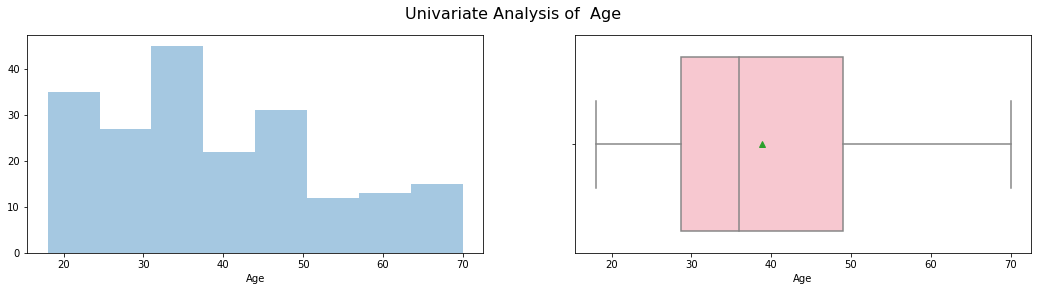

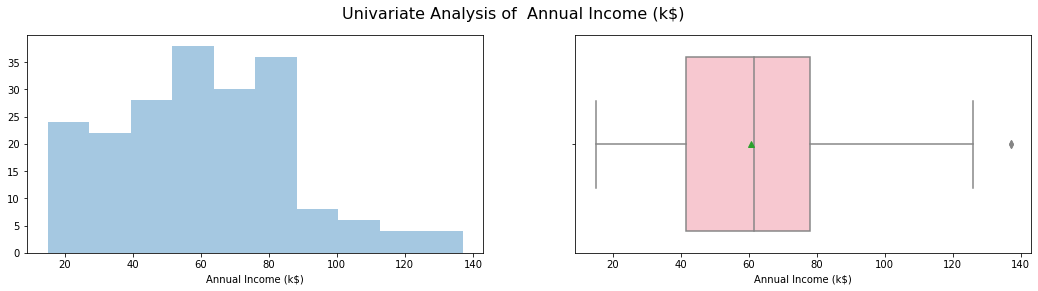

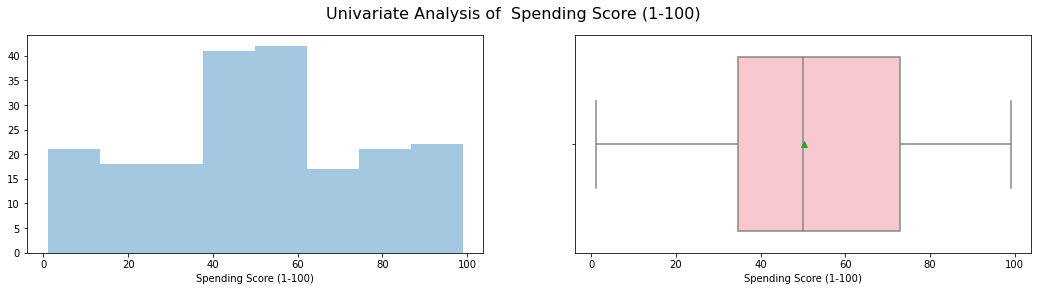

In [9]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in cols:
    fig,axes=plt.subplots(1,2,figsize=(18,4))
    sns.distplot(df[col],ax=axes[0],kde=False)
    sns.boxplot(df[col],ax=axes[1],orient="h",showmeans=True,color="pink")
    fig.suptitle("Univariate Analysis of  " + col,fontsize=16)
    plt.show()

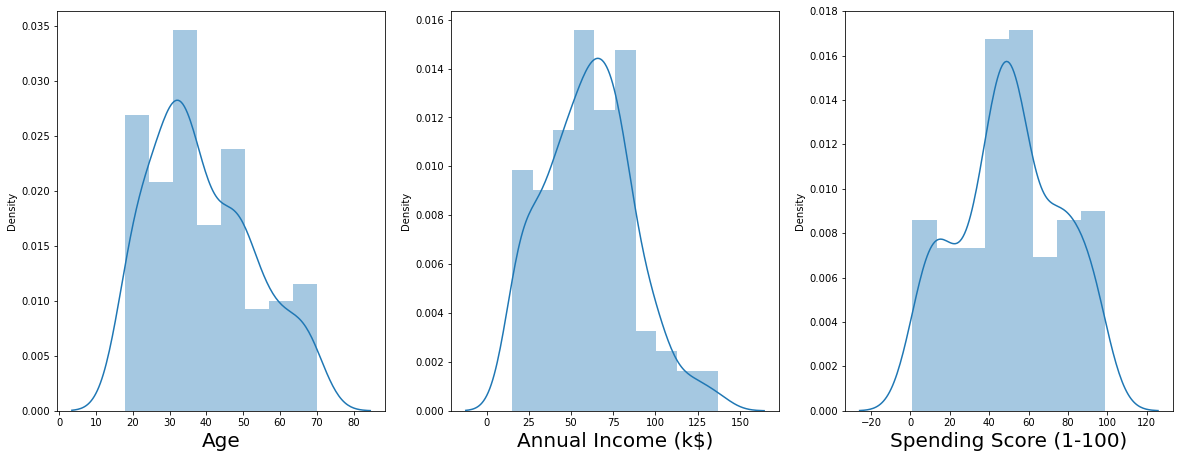

In [10]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_1.iloc[:,1:4]:
    if plotnumber<=4 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

## Bi-Variate Analysis

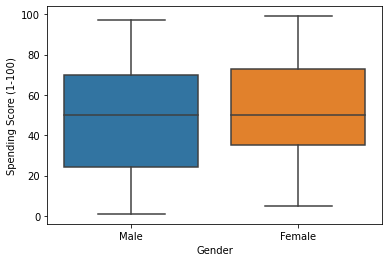

In [11]:
sns.boxplot(x = "Gender", y =  "Spending Score (1-100)", data = df)
plt.show()

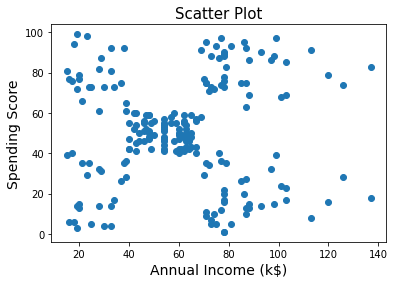

In [12]:
plt.scatter(x = df["Annual Income (k$)"], y = df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)", fontsize = 14)
plt.ylabel("Spending Score", fontsize = 14)
plt.title("Scatter Plot", fontsize = 15)
plt.show()

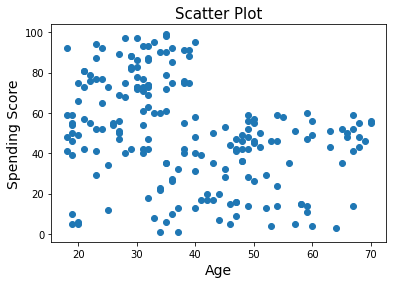

In [13]:
plt.scatter(x = df["Age"], y = df["Spending Score (1-100)"])
plt.xlabel("Age", fontsize = 14)
plt.ylabel("Spending Score", fontsize = 14)
plt.title("Scatter Plot", fontsize = 15)
plt.show()

## Multi-Variate Analysis

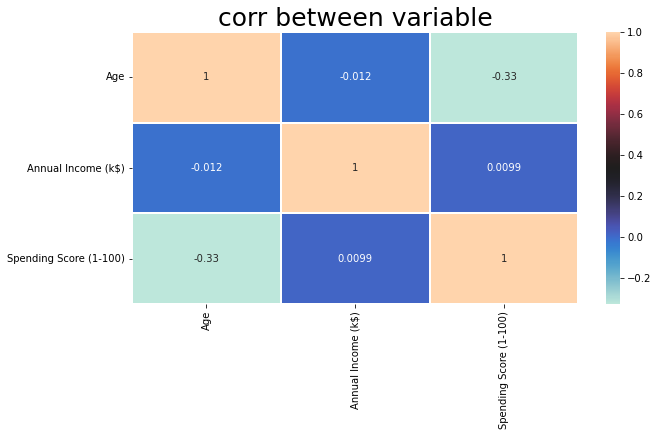

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10, 5)
plt.title("corr between variable",color='black',size=25)
plt.show()

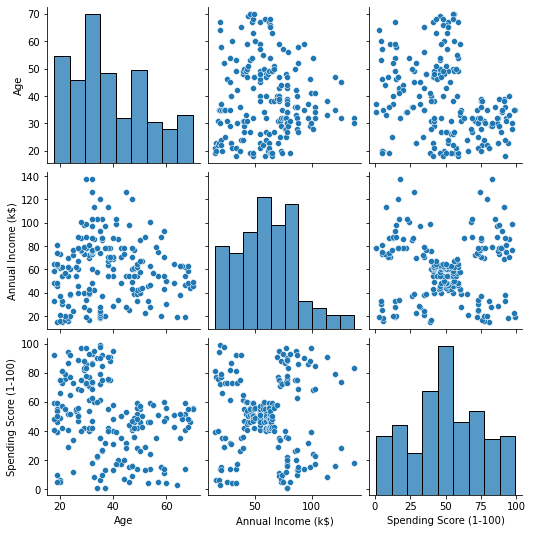

In [15]:
sns.pairplot(df)
plt.show()

## K-Means Clustering

In [16]:
from sklearn.cluster import KMeans

In [17]:
X = ["Annual Income (k$)", 'Spending Score (1-100)']

In [18]:
df[X].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Checking with different k values

### for k = 3

In [19]:
km_1 = KMeans(n_clusters = 3, random_state = 10)

In [20]:
km_1.fit(df[X])

KMeans(n_clusters=3, random_state=10)

In [21]:
km_1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [22]:
df["kmeans Labels"] = km_1.labels_
df.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans Labels
119,Female,50,67,57,0
63,Female,54,47,59,0
180,Female,37,97,32,1
146,Male,48,77,36,1
68,Male,19,48,59,0
144,Male,25,77,12,1
74,Male,59,54,47,0
189,Female,36,103,85,2
160,Female,56,79,35,1
106,Female,66,63,50,0


In [23]:
centroids = km_1.cluster_centers_
centroids

array([[44.15447154, 49.82926829],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513]])

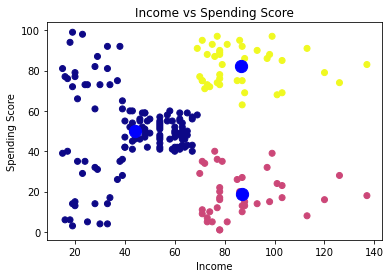

In [24]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c = df["kmeans Labels"], cmap='plasma') 
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=150) 
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Income vs Spending Score")
plt.show()

In [25]:
km_1.inertia_

106348.37306211119

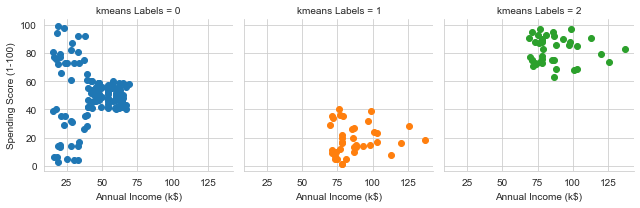

In [26]:
sns.set_style("whitegrid")
g = sns.FacetGrid(df, col="kmeans Labels", hue = "kmeans Labels")
g = g.map(plt.scatter, "Annual Income (k$)", "Spending Score (1-100)")  #edgecolor="w"
plt.rcParams["axes.labelsize"] = 15

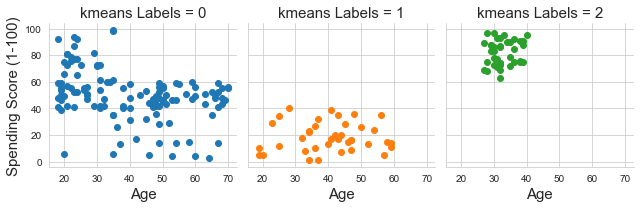

In [27]:
sns.set_style("whitegrid")
g = sns.FacetGrid(df, col="kmeans Labels", hue = "kmeans Labels")
g = g.map(plt.scatter, "Age", "Spending Score (1-100)")  #edgecolor="w"
plt.rcParams["axes.labelsize"] = 15

In [28]:
df["kmeans Labels"].value_counts()

0    123
2     39
1     38
Name: kmeans Labels, dtype: int64

In [29]:
# performance metrics
from sklearn.metrics import silhouette_score

### The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The value of the silhouette ranges between [1, -1], where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [30]:
silhouette_score(df[X],km_1.labels_) # range −1 to +1

0.46761358158775435

### The Dunn index is calculated as a ratio of the smallest inter-cluster distance to the largest intra-cluster distance. A high DI means better clustering since observations in each cluster are closer together, while clusters themselves are further away from each other.

In [31]:
y_pred1 = km_1.predict(df[X])

In [32]:
# We store the K-means results in a dataframe
pred = pd.DataFrame(y_pred1)
pred.columns = ['Type']

In [33]:
# we merge this dataframe with data_1[X]
prediction = pd.concat([df[X], pred], axis = 1)

In [34]:
prediction

,Annual Income (k$),Spending Score (1-100),Type
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1


In [35]:
# We store the clusters
clus0 = prediction.loc[prediction.Type == 0]
clus1 = prediction.loc[prediction.Type == 1]
clus2 = prediction.loc[prediction.Type == 2]
cluster_list = [clus0.values, clus1.values, clus2.values]

In [36]:
# Let’s focus now on two of these cluster, let’s call them ck and cl.
ck = cluster_list[0]
cl = cluster_list[1]

In [37]:
# We know we have to calculate the distance between the points in ck and cl.
values = np.ones([len(ck), len(cl)])
values

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [38]:
# For each pair of points, we then get the norm of xi-xj.
values[0, 1] = np.linalg.norm(ck[0]-cl[1])
print(ck[0], cl[1])
print(values[0, 1])

[15 39  0] [71 35  1]
56.15158056546583


In [39]:
# The calculation of δ(ck,cl) between two clusters ck and cl will be defined as follows:
import numpy as np

def δ(ck, cl):  
    values = np.ones([len(ck), len(cl)])
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
    return np.min(values)

In [40]:
# So, for our two clusters above, δ(ck,cl) will be:
δ(ck, cl)

6.48074069840786

In [41]:
# Within a single cluster ck, we can calculate Δ(ck) similarly as:
def Δ(ci):
    values = np.zeros([len(ci), len(ci)])
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
    return np.max(values)

In [42]:
# So, for instance, for our ck and cl we would have:
print(Δ(ck))
print(Δ(cl))

96.0260381354974
68.15423684555495


In [43]:
# We can now define the Dunn index as
def dunn(k_list):
    δs = np.ones([len(k_list), len(k_list)])
    Δs = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            δs[k, l] = δ(k_list[k], k_list[l])
            Δs[k] = Δ(k_list[k])
            di = np.min(δs)/np.max(Δs)
    return di

In [44]:
# We calculate the Dunn index for our clustered values list as
dunn(cluster_list)

0.010413842114249798

### for k = 4

In [45]:
df_1 = data_1.copy()

In [46]:
df_1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [47]:
df_1[X].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [48]:
km_2 = KMeans(n_clusters = 4, random_state = 10)
km_2.fit(df_1[X])

KMeans(n_clusters=4, random_state=10)

In [49]:
km_2.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [50]:
df_1["kmeans Labels"] = km_2.labels_
df_1.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans Labels
11,Female,35,19,99,0
53,Male,59,43,60,0
133,Female,31,72,71,2
23,Male,31,25,73,0
148,Female,34,78,22,1
88,Female,34,58,60,0
21,Male,25,24,73,0
56,Female,51,44,50,0
2,Female,20,16,6,3
24,Female,54,28,14,3


In [51]:
centroids = km_2.cluster_centers_
centroids

array([[48.26      , 56.48      ],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [52]:
km_2.inertia_

73679.78903948837

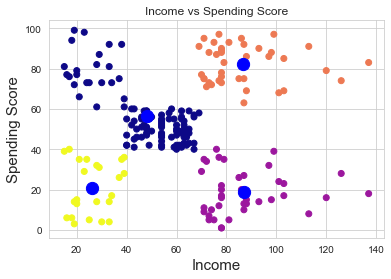

In [53]:
plt.scatter(df_1['Annual Income (k$)'], df_1['Spending Score (1-100)'], c = df_1["kmeans Labels"], cmap='plasma') 
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=150) 
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Income vs Spending Score")
plt.show()

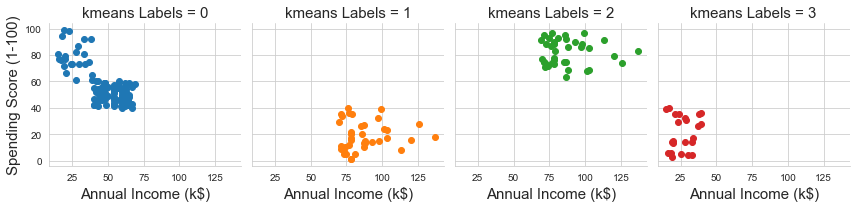

In [54]:
sns.set_style("whitegrid")
g = sns.FacetGrid(df_1, col="kmeans Labels", hue = "kmeans Labels")
g = g.map(plt.scatter, "Annual Income (k$)", "Spending Score (1-100)")  #edgecolor="w"
plt.rcParams["axes.labelsize"] = 15

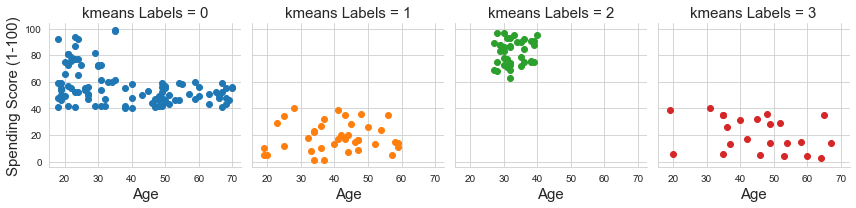

In [55]:
sns.set_style("whitegrid")
g = sns.FacetGrid(df_1, col="kmeans Labels", hue = "kmeans Labels")
g = g.map(plt.scatter, "Age", "Spending Score (1-100)")  #edgecolor="w"
plt.rcParams["axes.labelsize"] = 15

In [56]:
df_1["kmeans Labels"].value_counts()

0    100
2     39
1     38
3     23
Name: kmeans Labels, dtype: int64

In [57]:
silhouette_score(df_1[X],km_2.labels_) # range −1 to +1

0.4931963109249047

### for k = 5

In [58]:
df_2 = data_1.copy()
df_2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [59]:
df_2[X].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [60]:
km_3 = KMeans(n_clusters = 5, random_state = 10)
km_3.fit(df_2[X])

KMeans(n_clusters=5, random_state=10)

In [61]:
df_2["kmeans Labels"] = km_3.labels_
df_2.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans Labels
67,Female,68,48,48,1
138,Male,19,74,10,4
135,Female,29,73,88,2
66,Female,43,48,50,1
163,Female,31,81,93,2
161,Female,29,79,83,2
80,Male,57,54,51,1
46,Female,50,40,55,1
44,Female,49,39,28,3
58,Female,27,46,51,1


In [62]:
centroids = km_3.cluster_centers_
centroids

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [63]:
km_3.inertia_

44448.45544793369

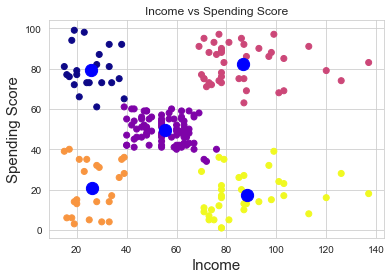

In [64]:
plt.scatter(df_2['Annual Income (k$)'], df_2['Spending Score (1-100)'], c = df_2["kmeans Labels"], cmap='plasma') 
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=150) 
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Income vs Spending Score")
plt.show()

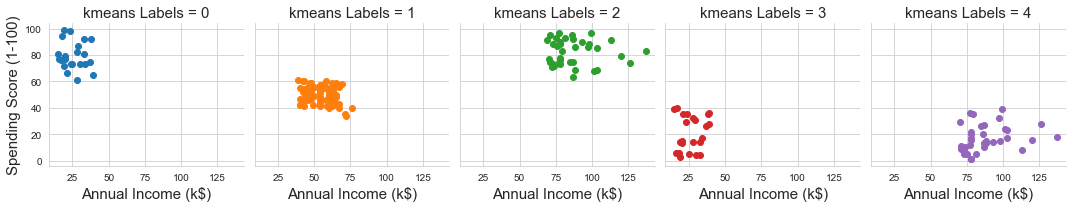

In [65]:
sns.set_style("whitegrid")
g = sns.FacetGrid(df_2, col="kmeans Labels", hue = "kmeans Labels")
g = g.map(plt.scatter, "Annual Income (k$)", "Spending Score (1-100)")  #edgecolor="w"
plt.rcParams["axes.labelsize"] = 15

### Insights
* Cluster 0: Low Income but High Spending Score
* Cluster 1: Normal Income with Normal Spending Score
* Cluster 2: High Income so High Spending Score
* Cluster 3: Low Income so Low Spending Score
* Cluster 4: High Income But Low Spending Score

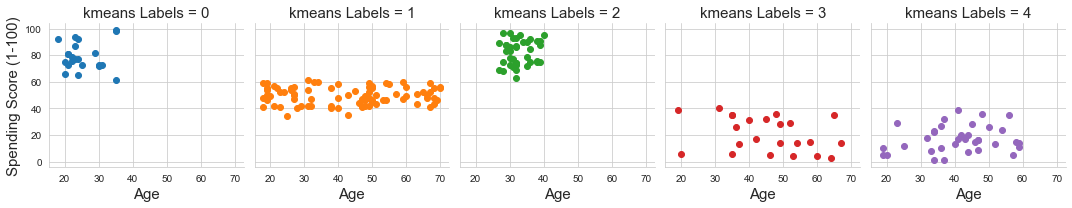

In [66]:
sns.set_style("whitegrid")
g = sns.FacetGrid(df_2, col="kmeans Labels", hue = "kmeans Labels")
g = g.map(plt.scatter, "Age", "Spending Score (1-100)")  #edgecolor="w"
plt.rcParams["axes.labelsize"] = 15

In [67]:
df_2["kmeans Labels"].value_counts()

1    81
2    39
4    35
3    23
0    22
Name: kmeans Labels, dtype: int64

In [68]:
silhouette_score(df_2[X],km_3.labels_) # range −1 to +1

0.553931997444648

### for k = 6

In [69]:
df_3 = data_1.copy()
df_3.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [70]:
df_3[X].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [71]:
km_4 = KMeans(n_clusters = 6, random_state = 10)
km_4.fit(df_3[X])

KMeans(n_clusters=6, random_state=10)

In [72]:
df_3["kmeans Labels"] = km_4.labels_
df_3.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans Labels
185,Male,30,99,97,5
107,Male,54,63,46,1
147,Female,32,77,74,3
91,Male,18,59,41,1
105,Female,21,62,42,1
28,Female,40,29,31,2
7,Female,23,18,94,4
59,Male,53,46,46,1
97,Female,27,60,50,1
167,Female,33,86,95,3


In [73]:
centroids = km_4.cluster_centers_
centroids

array([[ 87.75      ,  17.58333333],
       [ 55.0875    ,  49.7125    ],
       [ 26.30434783,  20.91304348],
       [ 78.03571429,  81.89285714],
       [ 25.72727273,  79.36363636],
       [108.18181818,  82.72727273]])

In [74]:
km_4.inertia_

37271.88623658948

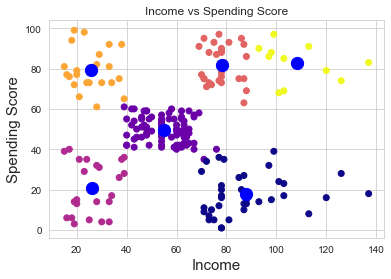

In [75]:
plt.scatter(df_3['Annual Income (k$)'], df_3['Spending Score (1-100)'], c = df_3["kmeans Labels"], cmap='plasma') 
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=150) 
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Income vs Spending Score")
plt.show()

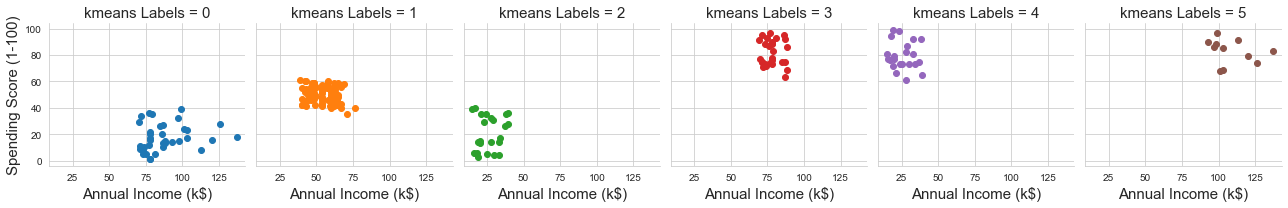

In [76]:
sns.set_style("whitegrid")
g = sns.FacetGrid(df_3, col="kmeans Labels", hue = "kmeans Labels")
g = g.map(plt.scatter, "Annual Income (k$)", "Spending Score (1-100)")  #edgecolor="w"
plt.rcParams["axes.labelsize"] = 15

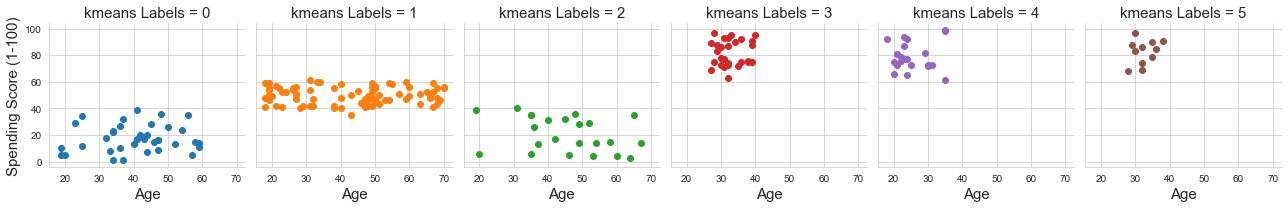

In [77]:
sns.set_style("whitegrid")
g = sns.FacetGrid(df_3, col="kmeans Labels", hue = "kmeans Labels")
g = g.map(plt.scatter, "Age", "Spending Score (1-100)")  #edgecolor="w"
plt.rcParams["axes.labelsize"] = 15

In [78]:
df_3["kmeans Labels"].value_counts()

1    80
0    36
3    28
2    23
4    22
5    11
Name: kmeans Labels, dtype: int64

In [79]:
silhouette_score(df_3[X],km_4.labels_) # range −1 to +1

0.5376203956398481

## Using elbow method for finding the optimal 'K' value

The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In [80]:
clusters = []
for i in range(1, 30):
    #print (i)
    km = KMeans(n_clusters=i).fit(data_1[X])
    clusters.append(km.inertia_)

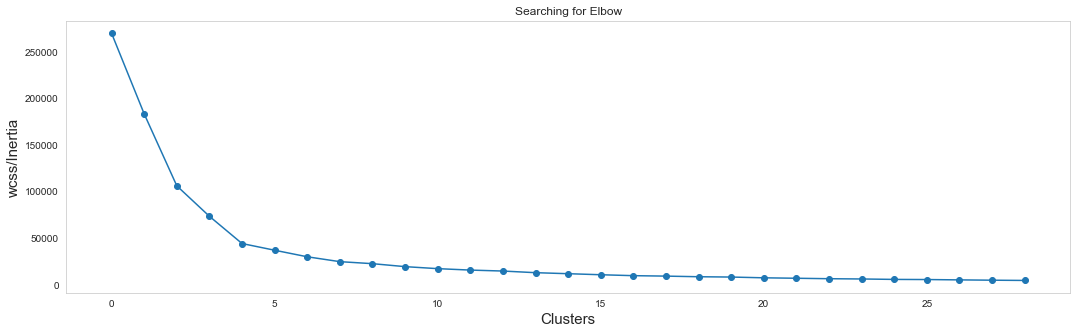

In [83]:
plt.figure(figsize=(18, 5))
plt.plot(clusters, '-o')
plt.title('Searching for Elbow')
plt.xlabel('Clusters')
plt.ylabel('wcss/Inertia')
plt.grid()
plt.show()

### Using elbow method we get the optimal value of 'K' as 5

In [84]:
# comparing silhouette score for all k values
score = {'K = 3': silhouette_score(df[X],km_1.labels_),
         'K = 4': silhouette_score(df_1[X],km_2.labels_),
         'K = 5': silhouette_score(df_2[X],km_3.labels_),
         'K = 6': silhouette_score(df_3[X],km_4.labels_)
        }

In [85]:
score=pd.DataFrame(score,index=['Silhouette Score'])
score.T

,Silhouette Score
K = 3,0.467614
K = 4,0.493196
K = 5,0.553932
K = 6,0.537620


### Silhouette Score for k = 5 is better than other k values

## Hierarchical Clustering - Agglomerative

In [86]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [92]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [103]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data_1[X])

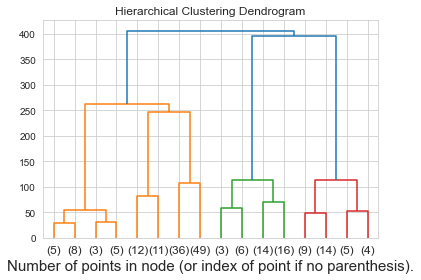

In [106]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()